In [1]:
from spotipy.oauth2 import SpotifyOAuth
from dotenv import load_dotenv
import spotipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

load_dotenv()

track_attributes = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
oauth_scopes="user-top-read"
t_range = "medium_term"
# sort_attribute="valence"
top_track_ids = []
track_heatmap_index = []
all_track_data = []

auth_manager = SpotifyOAuth(scope=oauth_scopes)
sp = spotipy.Spotify(auth_manager=auth_manager)

user_top_tracks = sp.current_user_top_tracks(time_range=t_range)

for track in user_top_tracks["items"]:
    track_name = track["name"]
    artist_name = track["artists"][0]["name"]
    top_track_ids.append(track["id"])
    track_heatmap_index.append(f"{track_name}-{artist_name}")

audio_analysis = sp.audio_features(top_track_ids)

for track in audio_analysis:
    track_data = []

    for attribute in track_attributes:
        track_data.append(track[attribute])

    all_track_data.append(track_data)

df = pd.DataFrame(all_track_data, index=track_heatmap_index, columns=track_attributes)

<Axes: >

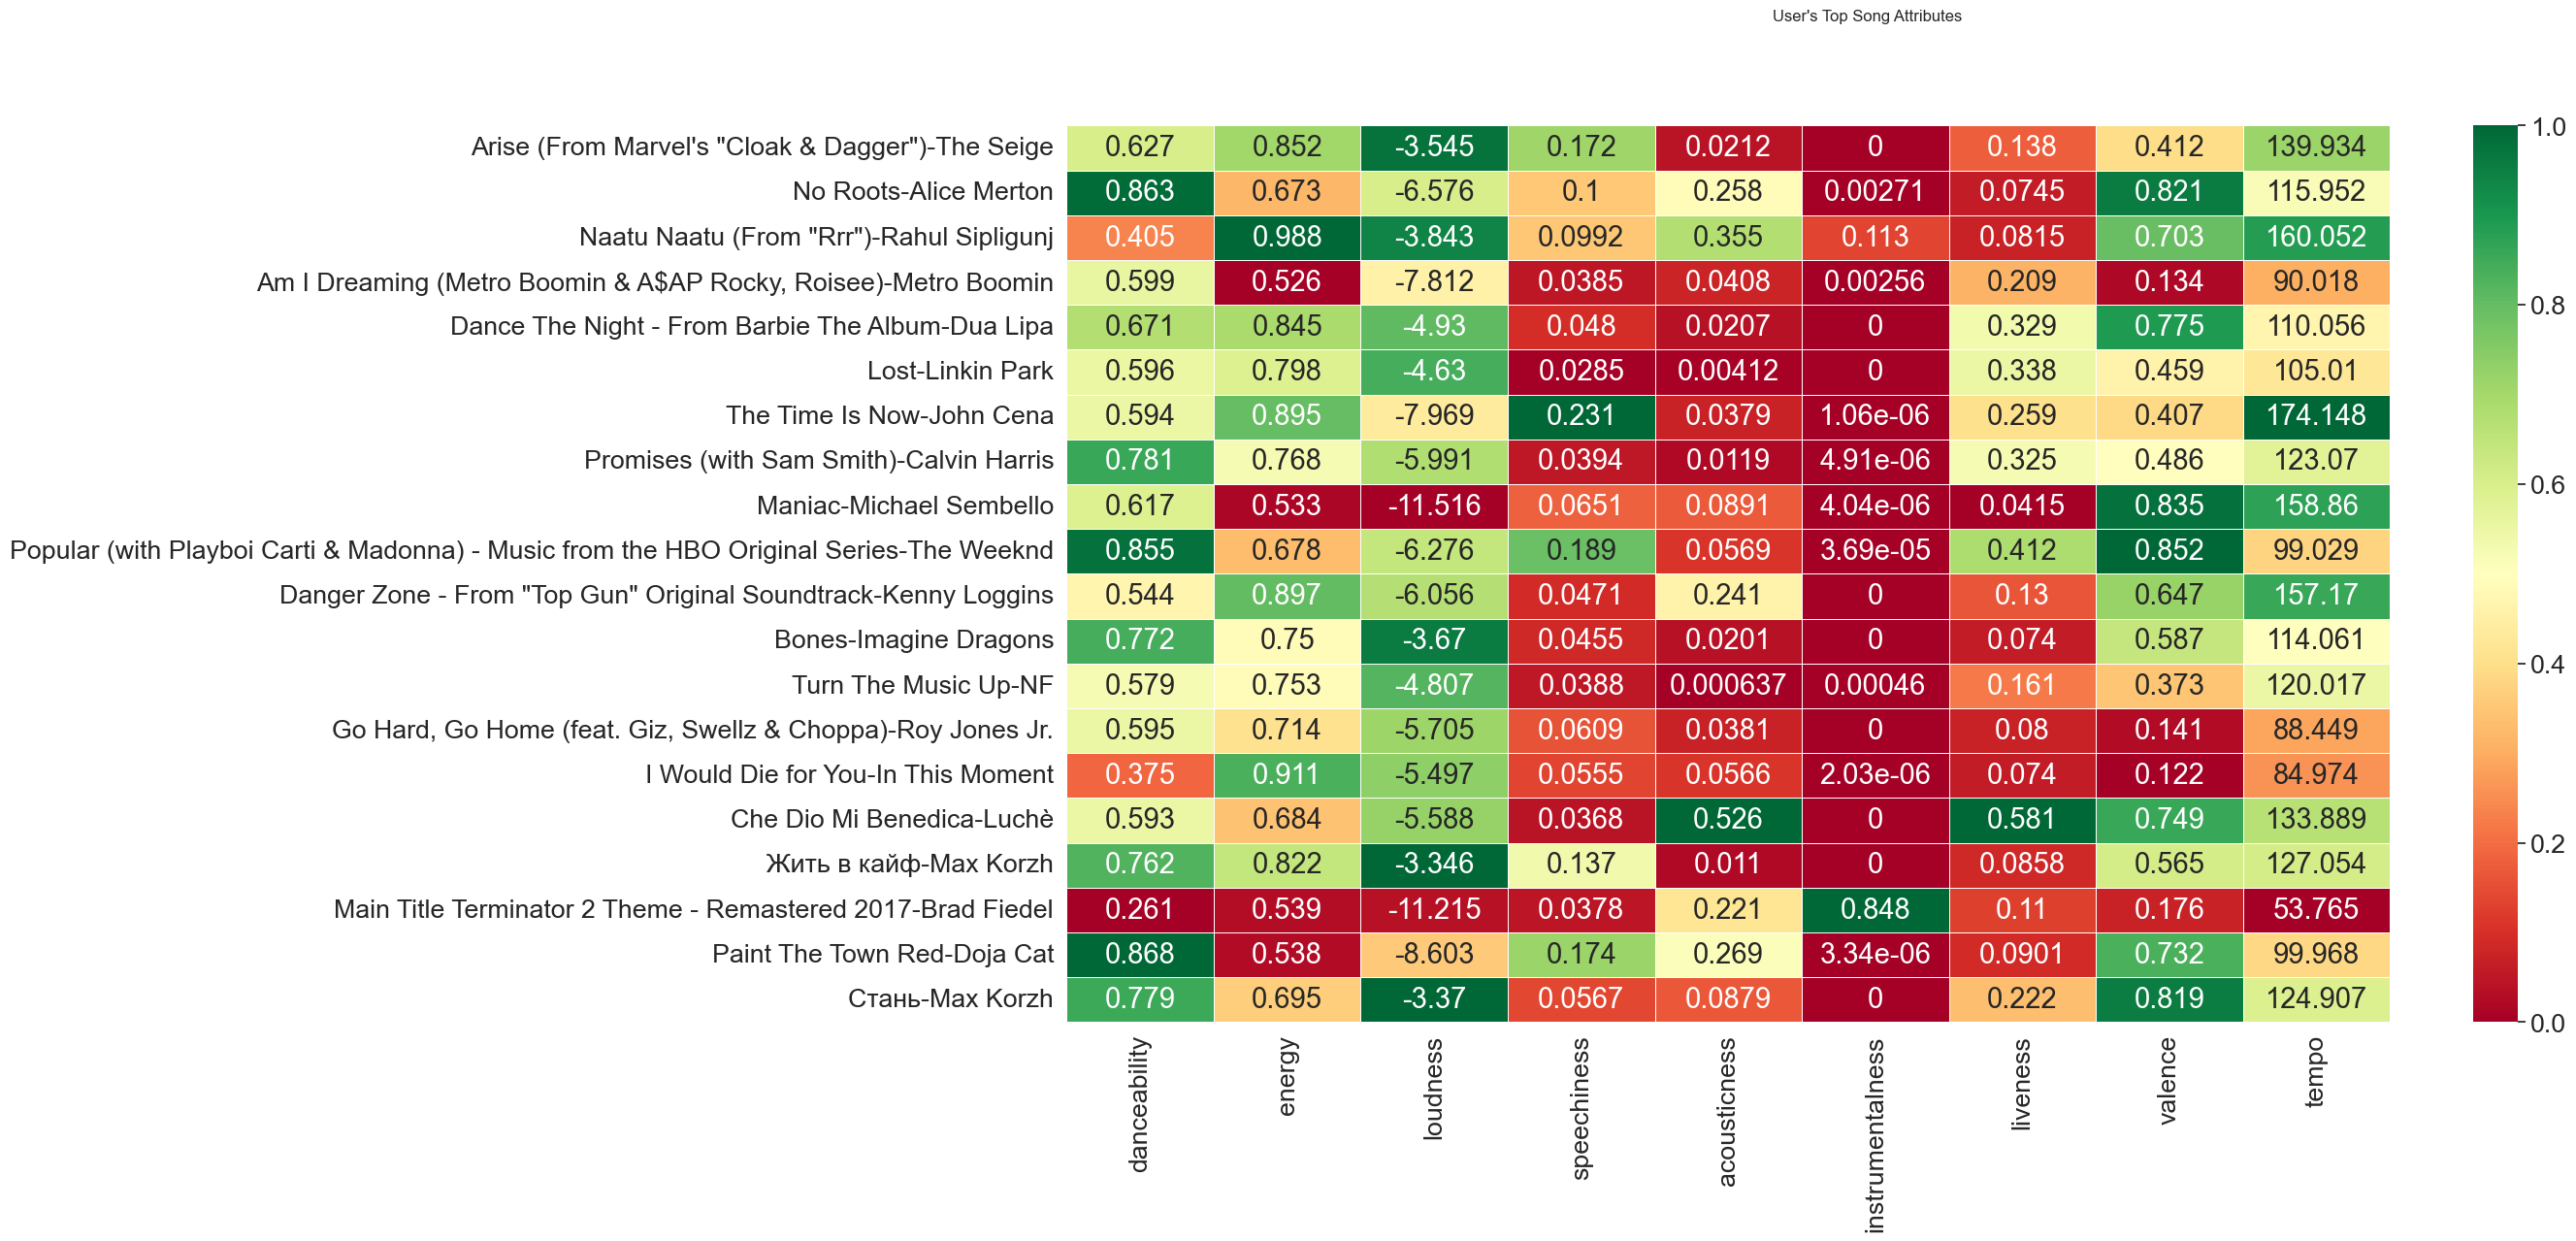

In [2]:
plt.figure(figsize = (22,12))
plt.suptitle("User's Top Song Attributes")

scaled_df = (df - df.min(axis=0))/(df.max(axis=0) - df.min(axis=0))
sns.set(font_scale=1.75)

sns.heatmap(scaled_df, annot=df, linewidths=.5, cmap="RdYlGn", fmt='g')

In [3]:
track_list = []

for track in user_top_tracks["items"]:
    track_data = []

    track_data.append(track["name"])

    artist_name = track["artists"][0]["name"]
    track_data.append(artist_name)

    track_year = track["album"]["release_date"]
    track_data.append(track_year)

    track_data.append(track["popularity"])

    track_list.append(track_data)

df = pd.DataFrame(track_list, columns=["Track Name", "Artist", "Release Date", "Popularity"])
df.sort_values(by=["Popularity"], ascending=False)

,Track Name,Artist,Release Date,Popularity
18,Paint The Town Red,Doja Cat,2023-08-04,94
4,Dance The Night - From Barbie The Album,Dua Lipa,2023-05-25,92
9,Popular (with Playboi Carti & Madonna) - Music...,The Weeknd,2023-06-02,91
11,Bones,Imagine Dragons,2022-07-01,85
3,"Am I Dreaming (Metro Boomin & A$AP Rocky, Roisee)",Metro Boomin,2023-06-02,82
10,"Danger Zone - From ""Top Gun"" Original Soundtrack",Kenny Loggins,1997-03-25,76
7,Promises (with Sam Smith),Calvin Harris,2018-08-17,76
5,Lost,Linkin Park,2023-02-10,74
8,Maniac,Michael Sembello,1983-04-11,72
1,No Roots,Alice Merton,2019-01-18,67


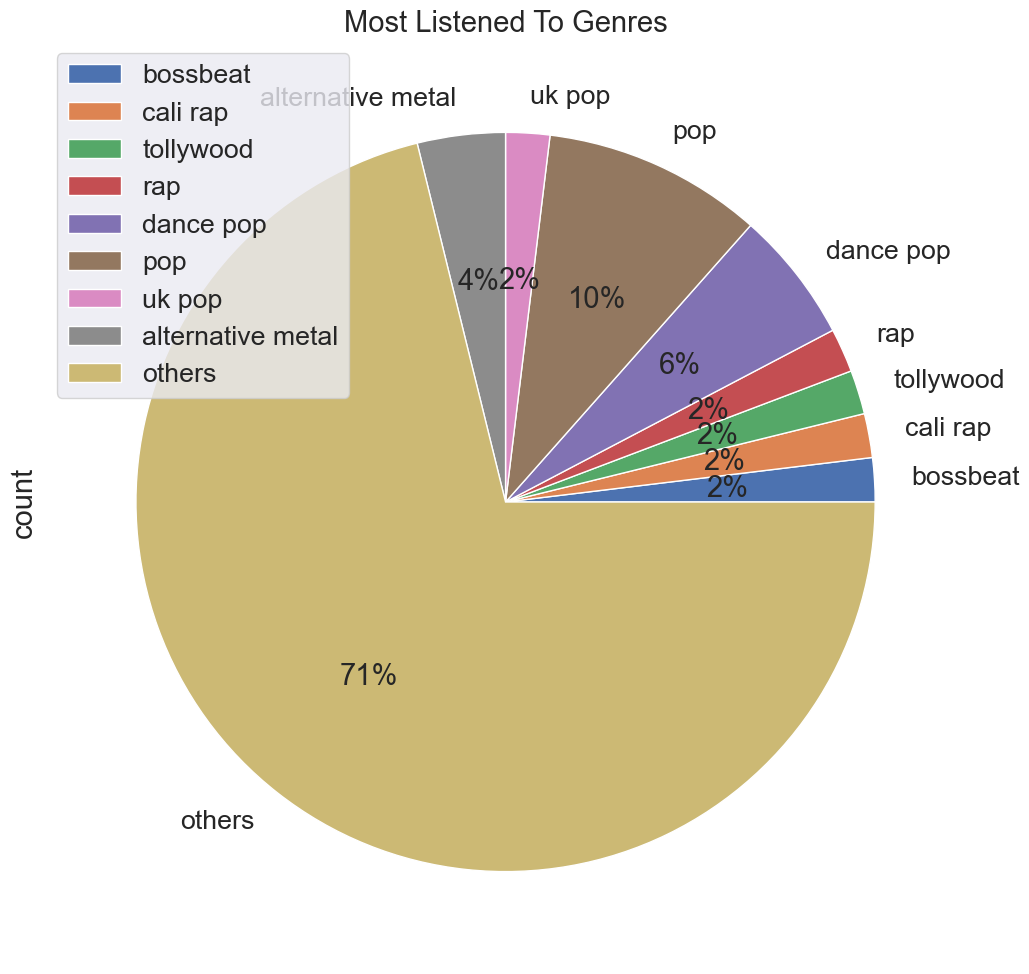

In [4]:
artist_list = []
user_genres_list = []
user_genres_count = []

for track in user_top_tracks["items"]:
    artist_id = track["artists"][0]["id"]
    artist_list.append(sp.artist(artist_id))

user_genres = {}
genre_dict = {"genre": [], "count": []}

for artist in artist_list:
    for genre in artist["genres"]:
        if genre in user_genres:
            user_genres[genre] = user_genres[genre] + 1
        else:
            user_genres[genre] = 1

for genre, count in user_genres.items():
    genre_dict["genre"].append(genre)
    genre_dict["count"].append(count)

df = pd.DataFrame(genre_dict)

df2 = df[:8].copy()

new_row = pd.DataFrame(data = {
    'genre' : ['others'],
    'count' : [df['count'][8:].sum()]
})

df2 = pd.concat([df2, new_row])
df2.plot(kind = 'pie', y = 'count', labels = df2['genre'], figsize=(12, 12), autopct='%1.0f%%', title="Most Listened To Genres")

plt.show()